In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
from datetime import timedelta
#from sklearn.metrics import mean_absolute_percentage_error
from tqdm import tqdm

In [ ]:
df = pd.read_csv('market_data_train.csv')

In [ ]:
df.head()

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06


In [ ]:
df.symbol.unique()

array(['1INCH', 'AAVE', 'ACM', 'ADA', 'AION', 'AKRO', 'ALGO', 'ALICE',
       'ALPHA', 'ANKR', 'ANT', 'AR', 'ARDR', 'ARPA', 'ASR', 'ATM', 'ATOM',
       'AUDIO', 'AUTO', 'AVA', 'AVAX', 'AXS', 'BADGER', 'BAKE', 'BAL',
       'BAND', 'BAR', 'BAT', 'BCH', 'BEAM', 'BEL', 'BLZ', 'BNB', 'BNT',
       'BTC', 'BTCST', 'BTG', 'BTS', 'BTT', 'BURGER', 'BZRX', 'CAKE',
       'CELO', 'CELR', 'CFX', 'CHR', 'CHZ', 'CKB', 'COCOS', 'COMP', 'COS',
       'COTI', 'CRV', 'CTK', 'CTSI', 'CTXC', 'CVC', 'DASH', 'DATA', 'DCR',
       'DEGO', 'DENT', 'DGB', 'DIA', 'DNT', 'DOCK', 'DODO', 'DOGE', 'DOT',
       'DREP', 'DUSK', 'EGLD', 'ENJ', 'EOS', 'EPS', 'ETC', 'ETH', 'FET',
       'FIL', 'FIO', 'FIRO', 'FIS', 'FLM', 'FORTH', 'FTM', 'FTT', 'FUN',
       'GRT', 'GTO', 'GXS', 'HARD', 'HBAR', 'HIVE', 'HNT', 'HOT', 'ICP',
       'ICX', 'INJ', 'IOST', 'IOTA', 'IOTX', 'IRIS', 'JST', 'JUV', 'KAVA',
       'KEY', 'KMD', 'KNC', 'KSM', 'LINA', 'LINK', 'LIT', 'LPT', 'LRC',
       'LSK', 'LTC', 'LTO', 'LUNA', 'MANA', 'MASK'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235084 entries, 0 to 2235083
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   symbol            object 
 1   time              object 
 2   open              float64
 3   high              float64
 4   low               float64
 5   close             float64
 6   market_cap        float64
 7   n_trades          int64  
 8   volume            float64
 9   taker_buy_volume  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 170.5+ MB


In [ ]:
df.describe()

,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
count,2.235084e+06,2.235084e+06,2.235084e+06,2.235084e+06,2.235084e+06,2.235084e+06,2.235084e+06,2.235084e+06
mean,3.092401e+02,3.122463e+02,3.060462e+02,3.092663e+02,5.133663e+09,2.984957e+03,1.960561e+06,9.791499e+05
std,2.897115e+03,2.927192e+03,2.865314e+03,2.897322e+03,4.225177e+10,1.136582e+04,1.373418e+07,6.832441e+06
min,7.050000e-06,7.110000e-06,6.300000e-06,7.040000e-06,0.000000e+00,1.000000e+00,2.405000e-03,0.000000e+00
25%,2.927000e-02,2.964000e-02,2.891000e-02,2.928000e-02,2.952531e+07,1.390000e+02,1.756327e+04,7.784697e+03
50%,3.415000e-01,3.458000e-01,3.372000e-01,3.415000e-01,1.430362e+08,5.810000e+02,1.151175e+05,5.545417e+04
75%,3.989500e+00,4.045000e+00,3.933925e+00,3.989600e+00,7.774754e+08,2.080000e+03,6.247238e+05,3.113743e+05
max,9.045459e+04,9.500000e+04,8.624000e+04,9.050000e+04,1.206442e+12,1.976442e+06,2.375468e+09,1.246835e+09


In [ ]:
df.isnull().sum()

symbol              0
time                0
open                0
high                0
low                 0
close               0
market_cap          0
n_trades            0
volume              0
taker_buy_volume    0
dtype: int64

In [ ]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('\n')

symbol
NEO     29809
ETH     29809
LTC     29809
BNB     29809
BTC     29809
        ...  
AR        416
POLS      301
MDX       179
MASK      158
LPT        87
Name: symbol, Length: 219, dtype: int64


time
2021-05-31 18:00:00    219
2021-05-31 08:00:00    219
2021-05-29 01:00:00    219
2021-05-30 11:00:00    219
2021-05-29 02:00:00    219
                      ... 
2018-01-19 13:00:00      5
2018-02-01 19:00:00      5
2018-01-15 22:00:00      5
2018-01-30 00:00:00      5
2018-01-23 23:00:00      5
Name: time, Length: 29809, dtype: int64


open
0.005100       239
0.005110       227
0.005200       218
0.005090       215
0.004800       214
              ... 
0.060058         1
0.027128         1
11.276300        1
0.316120         1
5213.760000      1
Name: open, Length: 432080, dtype: int64


high
0.320000     308
0.350000     306
0.400000     305
0.022000     301
0.310000     296
            ... 
0.400060       1
27.481000      1
12.665590      1
0.003821       1
0.357440       1
Name

In [ ]:
df.nunique()

symbol                  219
time                  29809
open                 432080
high                 401426
low                  399870
close                429540
market_cap          1769068
n_trades              55966
volume              2221309
taker_buy_volume    2213711
dtype: int64

Заполним пучтые значения

In [ ]:
df[(df['market_cap'] == 0) | (df['taker_buy_volume'] == 0)]

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
44299,AION,2020-10-04 00:00:00,0.0789,0.0789,0.0787,0.0787,3.684936e+07,8,364.031778,0.0
44596,AION,2020-10-16 09:00:00,0.0770,0.0770,0.0765,0.0765,3.581926e+07,16,2337.364954,0.0
44611,AION,2020-10-17 00:00:00,0.0784,0.0784,0.0784,0.0784,3.670889e+07,2,19.262880,0.0
44639,AION,2020-10-18 04:00:00,0.0792,0.0792,0.0790,0.0790,3.698982e+07,4,112.783806,0.0
44667,AION,2020-10-19 08:00:00,0.0774,0.0774,0.0772,0.0772,3.614702e+07,13,1711.527567,0.0
...,...,...,...,...,...,...,...,...,...,...
2223193,ZRX,2020-01-21 08:00:00,0.2363,0.2363,0.2355,0.2361,1.428056e+08,10,254.945800,0.0
2223229,ZRX,2020-01-22 20:00:00,0.2434,0.2434,0.2423,0.2423,1.465556e+08,11,407.831800,0.0
2223295,ZRX,2020-01-25 14:00:00,0.2225,0.2234,0.2225,0.2231,1.371863e+08,5,193.324000,0.0
2223308,ZRX,2020-01-26 03:00:00,0.2249,0.2249,0.2249,0.2249,1.382931e+08,1,58.881070,0.0


In [ ]:
df[(df['market_cap'] == 0) | (df['taker_buy_volume'] == 0)].symbol.nunique()

137

In [ ]:
means_to_replace = df.groupby('symbol').mean()[['market_cap', 'taker_buy_volume']].reset_index()
means_to_replace[(means_to_replace['market_cap'] == 0) | (means_to_replace['taker_buy_volume'] == 0)]

,symbol,market_cap,taker_buy_volume
130,NBS,0.0,65663.039502
178,SUN,0.0,449997.706698


In [ ]:
to_drop = df[df.symbol.isin(['NBS', 'SUN']) == True].index 

In [ ]:
df.drop(to_drop, inplace=True)

In [ ]:
means_to_replace = df.groupby('symbol').mean()[['market_cap', 'taker_buy_volume']].reset_index()
means_to_replace[(means_to_replace['market_cap'] == 0) | (means_to_replace['taker_buy_volume'] == 0)]

,symbol,market_cap,taker_buy_volume


In [ ]:
means_to_replace

,symbol,market_cap,taker_buy_volume
0,1INCH,5.675210e+08,1.438292e+06
1,AAVE,3.225183e+09,1.665238e+06
2,ACM,2.259087e+07,2.111224e+05
3,ADA,6.401495e+09,2.491576e+06
4,AION,6.415863e+07,9.393214e+04
...,...,...,...
212,YFII,9.060958e+07,5.391621e+05
213,ZEC,7.379123e+08,4.297843e+05
214,ZEN,3.797326e+08,2.565964e+05
215,ZIL,3.962189e+08,2.864320e+05


In [ ]:
df1 = pd.DataFrame()
for s in df.symbol.unique():
    a= df[df.symbol == s].copy()
    a['market_cap'].replace(0, means_to_replace[means_to_replace.symbol == s].market_cap.values[0], inplace=True)
    a['taker_buy_volume'].replace(0, means_to_replace[means_to_replace.symbol == s].taker_buy_volume.values[0], inplace=True)
    df1 = pd.concat([df1, a])

In [ ]:
df1[(df1['market_cap'] == 0) | (df1['taker_buy_volume'] == 0)].symbol.nunique()

0

In [ ]:
df1.head()

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06


In [ ]:
df = df1.copy()

In [ ]:
df.time = pd.to_datetime(df.time)
df['date'] = df.time.apply(lambda x : x.date())



In [ ]:
df.head()

,symbol,time,open,high,low,close,market_cap,n_trades,volume,taker_buy_volume,date
0,1INCH,2020-12-25 06:00:00,0.2000,3.0885,0.2000,2.5826,6.707592e+07,48768,3.553052e+07,1.724763e+07,2020-12-25
1,1INCH,2020-12-25 07:00:00,2.5824,2.6900,2.2249,2.5059,6.508385e+07,31099,2.244087e+07,9.861481e+06,2020-12-25
2,1INCH,2020-12-25 08:00:00,2.5152,2.8870,2.3609,2.6237,6.814338e+07,33001,2.130043e+07,1.160785e+07,2020-12-25
3,1INCH,2020-12-25 09:00:00,2.6318,2.8247,2.4650,2.6134,6.787587e+07,30459,1.749181e+07,9.087566e+06,2020-12-25
4,1INCH,2020-12-25 10:00:00,2.6104,2.7498,2.5629,2.6365,6.847583e+07,21023,9.919400e+06,4.798067e+06,2020-12-25


In [ ]:
market = df.groupby(['time']).agg([np.mean,sum]) #[('mean_price', 'mean')]

In [ ]:
market.head()

open                    high              \
                           mean         sum        mean         sum   
time                                                                  
2018-01-01 00:00:00  2956.36658  14781.8329  2956.45818  14782.2909   
2018-01-01 01:00:00  2951.15036  14755.7518  2951.49596  14757.4798   
2018-01-01 02:00:00  2911.27876  14556.3938  2926.15794  14630.7897   
2018-01-01 03:00:00  2842.87200  14214.3600  2888.83956  14444.1978   
2018-01-01 04:00:00  2870.44144  14352.2072  2930.82552  14654.1276   

                            low                   close              \
                           mean         sum        mean         sum   
time                                                                  
2018-01-01 00:00:00  2947.56258  14737.8129  2951.48260  14757.4130   
2018-01-01 01:00:00  2883.31720  14416.5860  2911.50618  14557.5309   
2018-01-01 02:00:00  2833.04050  14165.2025  2842.93598  14214.6799   
2018-01-01 03:00:00  2842.20880  14211.0440  2870.61330  14353.0665   
2018-01-01 04:00:00  2861.98864  14309.9432  2889.03782  14445.1891   

                       market_cap               n_trades               volume  \
                             mean           sum     mean    sum          mean   
time                                                                            
2018-01-01 00:00:00  6.379382e+10  3.189691e+11     35.4    177  1.807455e+04   
2018-01-01 01:00:00  6.296904e+10  3.148452e+11   2296.6  11483  1.701488e+06   
2018-01-01 02:00:00  6.160915e+10  3.080457e+11   1898.0   9490  1.533961e+06   
2018-01-01 03:00:00  6.221356e+10  3.110678e+11   1905.2   9526  1.546455e+06   
2018-01-01 04:00:00  6.270454e+10  3.135227e+11   2031.4  10157  1.575103e+06   

                                  taker_buy_volume                
                              sum             mean           sum  
time                                                              
2018-01-01 00:00:00  9.037273e+04      5904.705478  2.952353e+04  
2018-01-01 01:00:00  8.507439e+06    886706.868774  4.433534e+06  
2018-01-01 02:00:00  7.669806e+06    715775.353549  3.578877e+06  
2018-01-01 03:00:00  7.732273e+06    719741.309376  3.598707e+06  
2018-01-01 04:00:00  7.875516e+06    606651.881501  3.033259e+06

Капитализация

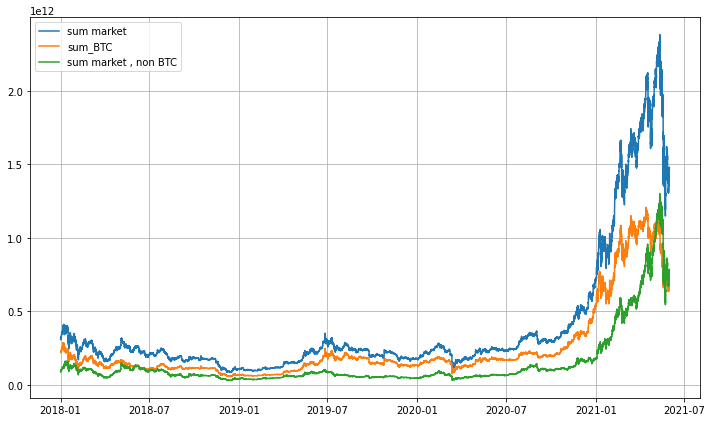

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(market.index, market[('market_cap', 'sum')], label = 'sum market')
plt.plot(df[df.symbol == 'BTC'].time, df[df.symbol == 'BTC'].market_cap, label = 'sum_BTC')
plt.plot(df[~df.symbol.isin(['BTC'])].groupby(['time']).agg([np.mean,sum]).index, df[~df.symbol.isin(['BTC'])].groupby(['time']).agg([np.mean,sum])[('market_cap', 'sum')], label = 'sum market , non BTC')
plt.legend()
plt.grid()
plt.show()

Кажется видна довольно сильная зависимость суммарной капитализации рынка от биткоина


Как меняется количество криптовалют

In [ ]:
symbols_count = df.groupby(['time']).count().symbol
symbols_count

time
2018-01-01 00:00:00      5
2018-01-01 01:00:00      5
2018-01-01 02:00:00      5
2018-01-01 03:00:00      5
2018-01-01 04:00:00      5
                      ... 
2021-05-31 16:00:00    217
2021-05-31 17:00:00    217
2021-05-31 18:00:00    217
2021-05-31 19:00:00    217
2021-05-31 20:00:00    217
Name: symbol, Length: 29809, dtype: int64

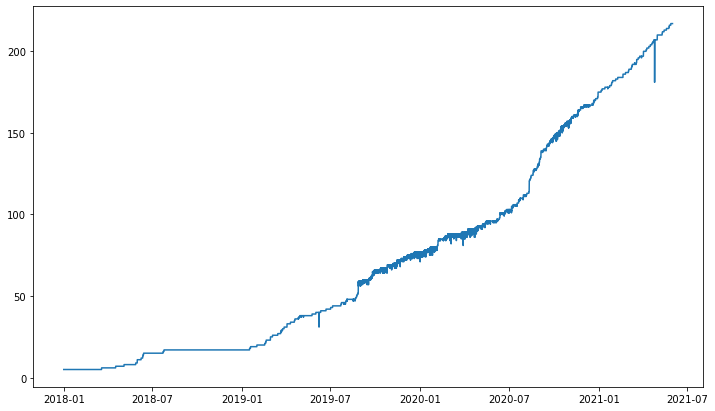

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(symbols_count.index, symbols_count.values, label = 'count symbols')
plt.show()

# Данные в ежедневный формат

In [ ]:
def take_first(x):
    return x.values[0]
def take_last(x):
    return x.values[-1]

In [ ]:
df_days = df.groupby(['symbol','date']).aggregate({'open': take_first,
                                'high': max, 
                                'low': min,
                                'close': take_last,
                                'n_trades': sum,
                                'market_cap': take_last,
                                'volume':sum, 
                                'taker_buy_volume': sum}).reset_index()

In [ ]:
df_days.to_csv('df_days.csv', index = False)


In [ ]:
df_days = pd.read_csv('df_days.csv')
df_days.date = pd.to_datetime(df_days.date).apply(lambda x : x.date())

# Добавить таргет (доходность) и средневзвешенный индикатор

In [ ]:
BTC = df_days[df_days.symbol == 'BTC'].copy()

In [ ]:
BTC.index = range(len(BTC))

In [ ]:
def calculate_profitability(X, days_back, price_col, time_col):
    X['profitability'] = 0
    for i in range(len(X)):
        try :
            v = X.loc[i, time_col] - timedelta(days = days_back)
            X.loc[i, 'profitability'] = X.loc[i, price_col]/X[X[time_col] == v][price_col].values[0] - 1
        except :
            X.loc[i, 'profitability'] = np.NaN
    return X  
    

In [ ]:
BTC = calculate_profitability(BTC, 1, 'close', 'date')

In [ ]:
BTC = BTC.dropna()

In [ ]:
BTC

,symbol,date,open,high,low,close,n_trades,market_cap,volume,taker_buy_volume,profitability
1,BTC,2018-01-02,13455.24,15473.49,12890.02,14799.96,175934,2.483213e+11,2.730912e+08,1.532587e+08,0.100205
2,BTC,2018-01-03,14799.97,15307.56,14150.00,14799.91,161970,2.483495e+11,2.377810e+08,1.326372e+08,-0.000003
3,BTC,2018-01-04,14792.32,15280.00,13918.04,14939.39,170713,2.507211e+11,3.090431e+08,1.846197e+08,0.009424
4,BTC,2018-01-05,14895.95,17118.13,14600.00,17021.36,190657,2.856922e+11,3.668175e+08,2.118478e+08,0.139361
5,BTC,2018-01-06,17021.36,17176.24,16011.21,16975.00,161411,2.849489e+11,3.141261e+08,1.854217e+08,-0.002724
...,...,...,...,...,...,...,...,...,...,...,...
1242,BTC,2021-05-27,38957.83,40411.14,37134.27,38503.15,2102177,7.207770e+11,3.385201e+09,1.655766e+09,-0.011671
1243,BTC,2021-05-28,38503.16,38877.83,34684.00,35061.65,2655912,6.563784e+11,4.880786e+09,2.312898e+09,-0.089382
1244,BTC,2021-05-29,35061.92,37338.58,33632.76,34467.84,2169588,6.452860e+11,3.948359e+09,1.907578e+09,-0.016936
1245,BTC,2021-05-30,34468.95,36488.00,33379.00,35741.03,1595345,6.691543e+11,2.675985e+09,1.362647e+09,0.036938


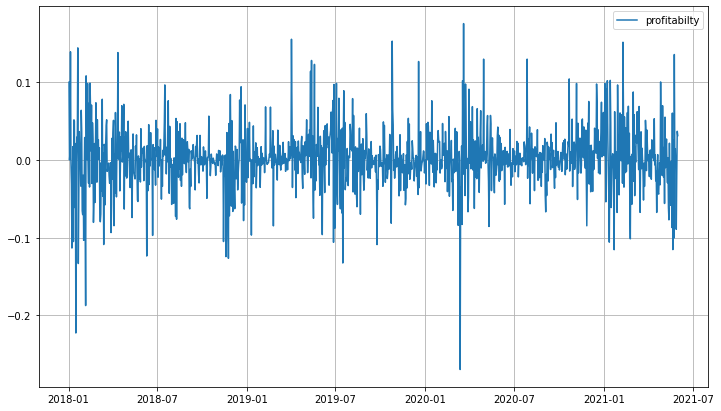

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(BTC.date, BTC.profitability, label = 'profitabilty')
plt.grid()
plt.legend()
plt.show()

Для всех данных

In [ ]:
data = pd.DataFrame()
for i in tqdm(df_days.symbol.unique()):
    data_s = df_days[df_days.symbol == i].copy()
    data_s.index = range(len(data_s))
    data_s = calculate_profitability(data_s, 1, 'close', 'date')
    data_s = data_s.dropna()
    data = pd.concat([data, data_s])
data.reset_index(drop = True, inplace = True)

100%|████████████████████████████████████████████████████████████████████████████████| 217/217 [02:21<00:00,  1.53it/s]


In [ ]:
data.to_csv('data.csv', index = False)

In [ ]:
data = pd.read_csv('data.csv')
data.date = pd.to_datetime(data.date)

In [ ]:
data.head()

,symbol,date,open,high,low,close,n_trades,market_cap,volume,taker_buy_volume,profitability
0,1INCH,2020-12-26,2.1936,2.4609,1.5717,1.6221,314848,4.212958e+07,1.132451e+08,5.393879e+07,-0.260531
1,1INCH,2020-12-27,1.6206,1.6668,1.0360,1.1001,301197,2.857207e+07,9.892812e+07,4.747393e+07,-0.321805
2,1INCH,2020-12-28,1.1019,1.2787,1.0353,1.0906,157507,7.870224e+07,4.796362e+07,2.439249e+07,-0.008636
3,1INCH,2020-12-29,1.0889,1.1344,0.7541,0.8852,164635,6.387972e+07,4.745768e+07,2.154755e+07,-0.188337
4,1INCH,2020-12-30,0.8848,1.2574,0.8702,1.0755,206257,7.761256e+07,6.186171e+07,3.158955e+07,0.214980


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92871 entries, 0 to 92870
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symbol            92871 non-null  object 
 1   date              92871 non-null  object 
 2   open              92871 non-null  float64
 3   high              92871 non-null  float64
 4   low               92871 non-null  float64
 5   close             92871 non-null  float64
 6   n_trades          92871 non-null  int64  
 7   market_cap        92871 non-null  float64
 8   volume            92871 non-null  float64
 9   taker_buy_volume  92871 non-null  float64
 10  profitability     92871 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 7.8+ MB


In [ ]:
data

,symbol,date,open,high,low,close,n_trades,market_cap,volume,taker_buy_volume,profitability
0,1INCH,2020-12-26,2.1936,2.4609,1.5717,1.6221,314848,4.212958e+07,1.132451e+08,5.393879e+07,-0.260531
1,1INCH,2020-12-27,1.6206,1.6668,1.0360,1.1001,301197,2.857207e+07,9.892812e+07,4.747393e+07,-0.321805
2,1INCH,2020-12-28,1.1019,1.2787,1.0353,1.0906,157507,7.870224e+07,4.796362e+07,2.439249e+07,-0.008636
3,1INCH,2020-12-29,1.0889,1.1344,0.7541,0.8852,164635,6.387972e+07,4.745768e+07,2.154755e+07,-0.188337
4,1INCH,2020-12-30,0.8848,1.2574,0.8702,1.0755,206257,7.761256e+07,6.186171e+07,3.158955e+07,0.214980
...,...,...,...,...,...,...,...,...,...,...,...
92866,ZRX,2021-05-27,1.1324,1.1888,1.0225,1.1076,36198,9.325120e+08,1.049805e+07,5.423639e+06,-0.021036
92867,ZRX,2021-05-28,1.1078,1.1243,0.9245,0.9421,43691,7.931740e+08,1.264365e+07,6.685530e+06,-0.149422
92868,ZRX,2021-05-29,0.9420,1.0089,0.8432,0.8922,27272,7.511621e+08,6.976375e+06,3.629081e+06,-0.052967
92869,ZRX,2021-05-30,0.8905,0.9909,0.8421,0.9444,22351,7.951104e+08,5.166297e+06,2.636999e+06,0.058507


In [ ]:
data.date.nunique()

1246

Добавление индикатора

In [ ]:
# средневзвешенный 
ind_1 = data.groupby('date').mean().reset_index()[['date', 'profitability']]
ind_1.columns = ['date', 'profit_ind_1']
ind_1

,date,profit_ind_1
0,2018-01-02,0.116414
1,2018-01-03,0.041759
2,2018-01-04,-0.011997
3,2018-01-05,0.168658
4,2018-01-06,0.140414
...,...,...
1241,2021-05-27,-0.014967
1242,2021-05-28,-0.134624
1243,2021-05-29,-0.037431
1244,2021-05-30,0.063033


In [ ]:
data = data.merge(ind_1,on = 'date', how = 'right')
data = data.sort_values(['symbol', 'date']).reset_index(drop = True)
data.head()

,symbol,date,open,high,low,close,n_trades,market_cap,volume,taker_buy_volume,profitability,profit_ind_1
0,1INCH,2020-12-26,2.1936,2.4609,1.5717,1.6221,314848,4.212958e+07,1.132451e+08,5.393879e+07,-0.260531,0.010188
1,1INCH,2020-12-27,1.6206,1.6668,1.0360,1.1001,301197,2.857207e+07,9.892812e+07,4.747393e+07,-0.321805,0.024765
2,1INCH,2020-12-28,1.1019,1.2787,1.0353,1.0906,157507,7.870224e+07,4.796362e+07,2.439249e+07,-0.008636,0.019655
3,1INCH,2020-12-29,1.0889,1.1344,0.7541,0.8852,164635,6.387972e+07,4.745768e+07,2.154755e+07,-0.188337,-0.027361
4,1INCH,2020-12-30,0.8848,1.2574,0.8702,1.0755,206257,7.761256e+07,6.186171e+07,3.158955e+07,0.214980,-0.002791


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_scores = [(i, r2_score(data[data.symbol == i].profit_ind_1, data[data.symbol == i].profitability)) for i in data.symbol.unique()] #.sort(key=lambda x:x[1])

In [ ]:
sorted(r2_scores, key=lambda tup: tup[1], reverse=True)[:10]

[('AR', 0.826469276775929),
 ('POLS', 0.8123926818540375),
 ('ETH', 0.6979030499007212),
 ('BTC', 0.6291410931062196),
 ('LTC', 0.6051908586286134),
 ('FTT', 0.5628504893218675),
 ('IOTA', 0.5330991883107394),
 ('NEO', 0.5253181894572585),
 ('BTG', 0.5156096755500457),
 ('PUNDIX', 0.5090043464592897)]

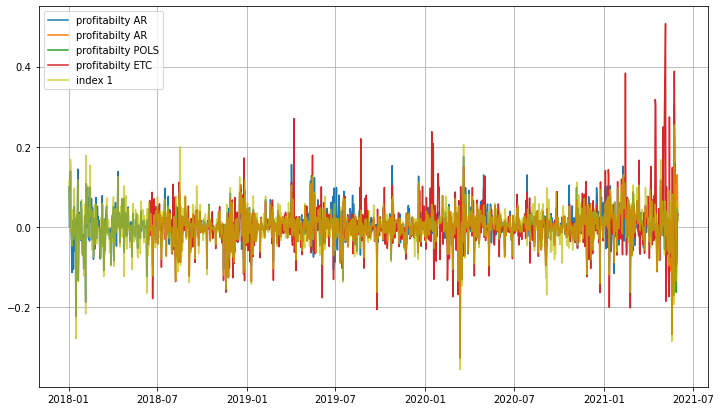

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(data[data.symbol == 'BTC'].date, data[data.symbol == 'BTC'].profitability, label = 'profitabilty AR')
plt.plot(data[data.symbol == 'AR'].date, data[data.symbol == 'AR'].profitability, label = 'profitabilty AR')
plt.plot(data[data.symbol == 'POLS'].date, data[data.symbol == 'POLS'].profitability, label = 'profitabilty POLS')
plt.plot(data[data.symbol == 'ETC'].date, data[data.symbol == 'ETC'].profitability, label = 'profitabilty ETC')
plt.plot(data[data.symbol == 'BTC'].date, data[data.symbol == 'BTC'].profit_ind_1, label = 'index 1', alpha = 0.7, color = 'y')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# По капитализации

In [ ]:
# суммарная капиталищация на каждый день (знаменятель в формуле)
cap_sum = data.groupby('date').sum().reset_index()[['date', 'market_cap']]
cap_sum.columns = ['date', 'cap_sum_this_day']
cap_sum

,date,cap_sum_this_day
0,2018-01-02,3.512454e+11
1,2018-01-03,3.607069e+11
2,2018-01-04,3.624588e+11
3,2018-01-05,3.963351e+11
4,2018-01-06,4.054723e+11
...,...,...
1241,2021-05-27,1.540203e+12
1242,2021-05-28,1.376422e+12
1243,2021-05-29,1.329430e+12
1244,2021-05-30,1.398552e+12


In [ ]:
# Дальше получаем числитель из формулы
data['indx_2'] = data.profitability * data.market_cap

In [ ]:
cap_sum1 = data.groupby('date').sum().reset_index()[['date', 'indx_2']]
cap_sum1.columns = ['date', 'cap_sum_up']
cap_sum1

,date,cap_sum_up
0,2018-01-02,3.815872e+10
1,2018-01-03,1.050316e+10
2,2018-01-04,1.763872e+09
3,2018-01-05,3.935427e+10
4,2018-01-06,1.017184e+10
...,...,...
1241,2021-05-27,-3.191589e+10
1242,2021-05-28,-1.454033e+11
1243,2021-05-29,-4.514238e+10
1244,2021-05-30,7.371234e+10


In [ ]:
ind2 = cap_sum.merge(cap_sum1, on = 'date')
ind2

,date,cap_sum_this_day,cap_sum_up
0,2018-01-02,3.512454e+11,3.815872e+10
1,2018-01-03,3.607069e+11,1.050316e+10
2,2018-01-04,3.624588e+11,1.763872e+09
3,2018-01-05,3.963351e+11,3.935427e+10
4,2018-01-06,4.054723e+11,1.017184e+10
...,...,...,...
1241,2021-05-27,1.540203e+12,-3.191589e+10
1242,2021-05-28,1.376422e+12,-1.454033e+11
1243,2021-05-29,1.329430e+12,-4.514238e+10
1244,2021-05-30,1.398552e+12,7.371234e+10


In [ ]:
# расчитываем требуемый индех
ind2['profit_ind_2'] = ind2['cap_sum_up'] / ind2['cap_sum_this_day'] 
ind2.drop(['cap_sum_this_day', 'cap_sum_up'], axis = 1, inplace=True)
ind2

,date,profit_ind_2
0,2018-01-02,0.108638
1,2018-01-03,0.029118
2,2018-01-04,0.004866
3,2018-01-05,0.099295
4,2018-01-06,0.025086
...,...,...
1241,2021-05-27,-0.020722
1242,2021-05-28,-0.105639
1243,2021-05-29,-0.033956
1244,2021-05-30,0.052706


In [ ]:
data = data.merge(ind2, on = 'date', how = 'left')
data = data.sort_values(['symbol', 'date']).reset_index(drop = True)
data.drop('indx_2', axis = 1, inplace = True)

In [ ]:
data.head()

,symbol,date,open,high,low,close,n_trades,market_cap,volume,taker_buy_volume,profitability,profit_ind_1,profit_ind_2
0,1INCH,2020-12-26,2.1936,2.4609,1.5717,1.6221,314848,4.212958e+07,1.132451e+08,5.393879e+07,-0.260531,0.010188,0.059273
1,1INCH,2020-12-27,1.6206,1.6668,1.0360,1.1001,301197,2.857207e+07,9.892812e+07,4.747393e+07,-0.321805,0.024765,0.014809
2,1INCH,2020-12-28,1.1019,1.2787,1.0353,1.0906,157507,7.870224e+07,4.796362e+07,2.439249e+07,-0.008636,0.019655,0.020706
3,1INCH,2020-12-29,1.0889,1.1344,0.7541,0.8852,164635,6.387972e+07,4.745768e+07,2.154755e+07,-0.188337,-0.027361,0.003501
4,1INCH,2020-12-30,0.8848,1.2574,0.8702,1.0755,206257,7.761256e+07,6.186171e+07,3.158955e+07,0.214980,-0.002791,0.047808


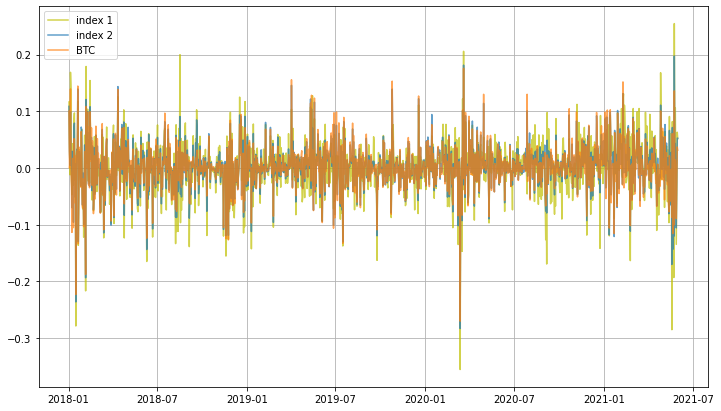

In [ ]:
plt.figure(figsize = (12, 7))
#plt.plot(data[data.symbol == 'BTC'].date, data[data.symbol == 'BTC'].profitability, label = 'profitabilty AR')
#plt.plot(data[data.symbol == 'AR'].date, data[data.symbol == 'AR'].profitability, label = 'profitabilty AR')
#plt.plot(data[data.symbol == 'POLS'].date, data[data.symbol == 'POLS'].profitability, label = 'profitabilty POLS')
#plt.plot(data[data.symbol == 'ETC'].date, data[data.symbol == 'ETC'].profitability, label = 'profitabilty ETC')
plt.plot(data[data.symbol == 'BTC'].date,data[data.symbol == 'BTC'].profit_ind_1, label = 'index 1', alpha = 0.7, color = 'y')
plt.plot(data[data.symbol == 'BTC'].date, data[data.symbol == 'BTC'].profit_ind_2, label = 'index 2', alpha = 0.7 )
plt.plot(data[data.symbol == 'BTC'].date, data[data.symbol == 'BTC'].profitability, label = 'BTC', alpha = 0.7 )
plt.grid()
plt.legend()
plt.show()

In [ ]:
r2_score(data[data.symbol == 'BTC'].profit_ind_1, data[data.symbol == 'BTC'].profit_ind_2)

0.7790474683194138

# Выбор портвеля по Sharp ratio
To be done

# Нейросеть для предсказания доходности

In [17]:
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 

На примере биткоина

In [10]:
#data.to_csv('data_prepr.csv', index = False)
data = pd.read_csv('data_prepr.csv')

In [24]:
X = data[data.symbol == 'BTC'][['open', 'high', 'low', 'close', 'n_trades', 'market_cap', 'volume', 'taker_buy_volume', 'profit_ind_1', 'profit_ind_2', 'profitability']].reset_index(drop=True)
y = data[data.symbol == 'BTC'].profitability

In [25]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(X)
Y_data = Y_scaler.fit_transform(np.array(y).reshape(-1, 1)) 

In [27]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])
        indicey = range(i, i+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y) 

In [41]:
X_data.shape

(1246, 11)

In [54]:
hist_window = 60
horizon = 1
TRAIN_SPLIT = 1165
X_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
X_valid, y_valid = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon) 

In [55]:
print('Multiple window of past history\n')
print(X_train[0])
print('\n Target horizon\n')
print(y_train[0]) 

Multiple window of past history

[[1.70431931e-01 1.98075433e-01 1.65360883e-01 1.92819485e-01
  2.21887835e-02 1.70679495e-01 1.78264065e-02 2.16018755e-02
  7.73449866e-01 8.15602959e-01 8.30555123e-01]
 [1.92833770e-01 1.95380780e-01 1.86765911e-01 1.92818652e-01
  1.99340103e-02 1.70704561e-01 1.51651471e-02 1.83263496e-02
  6.51009914e-01 6.49974889e-01 6.05709166e-01]
 [1.92706329e-01 1.94933214e-01 1.82825284e-01 1.95142288e-01
  2.13457463e-02 1.72811501e-01 2.05360368e-02 2.65832707e-02
  5.62845137e-01 5.99461999e-01 6.26862987e-01]
 [1.94432700e-01 2.24783890e-01 1.94410685e-01 2.29826405e-01
  2.45661128e-02 2.03880843e-01 2.48903747e-02 3.09081862e-02
  8.59133811e-01 7.96143084e-01 9.18412438e-01]
 [2.29839877e-01 2.25727579e-01 2.18384866e-01 2.29054081e-01
  1.98437483e-02 2.03220455e-01 2.09191281e-02 2.67106533e-02
  8.12810578e-01 6.41577144e-01 5.99605505e-01]
 [2.29067733e-01 2.25189883e-01 2.11568956e-01 2.20241323e-01
  1.34966682e-02 1.95361542e-01 1.32380975e-0

In [56]:
X_train.shape

(1105, 60, 11)

In [57]:
X_valid.shape

(20, 60, 11)

In [66]:
batch_size = 256
buffer_size = 256
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size) #.repeat()
val_data = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
val_data = val_data.batch(batch_size) #.repeat()

In [67]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True), 
                              input_shape=X_train.shape[-2:]),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(units=horizon),
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 60, 256)          143360    
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 60, 256)           0         
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)               

In [68]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [83]:
history = lstm_model.fit(train_data,
                         epochs=100,
                         #steps_per_epoch=100,
                         validation_data=val_data,
                         #validation_steps=50,
                         verbose=1,
                         callbacks=callbacks)

Epoch 1/100
5/5 [==============================] - 1s 101ms/step - loss: 0.0105 - val_loss: 0.0203
Epoch 2/100
5/5 [==============================] - 1s 105ms/step - loss: 0.0101 - val_loss: 0.0187
Epoch 3/100
5/5 [==============================] - 0s 97ms/step - loss: 0.0102 - val_loss: 0.0187
Epoch 4/100
5/5 [==============================] - 0s 76ms/step - loss: 0.0108 - val_loss: 0.0190
Epoch 5/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0102 - val_loss: 0.0211
Epoch 6/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0100 - val_loss: 0.0196
Epoch 7/100
5/5 [==============================] - 0s 79ms/step - loss: 0.0101 - val_loss: 0.0216
Epoch 8/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0101 - val_loss: 0.0215
Epoch 9/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0103 - val_loss: 0.0279
Epoch 10/100
5/5 [==============================] - 0s 77ms/step - loss: 0.0103 - val_loss: 0.0226
Epoch 11/100
5/5 

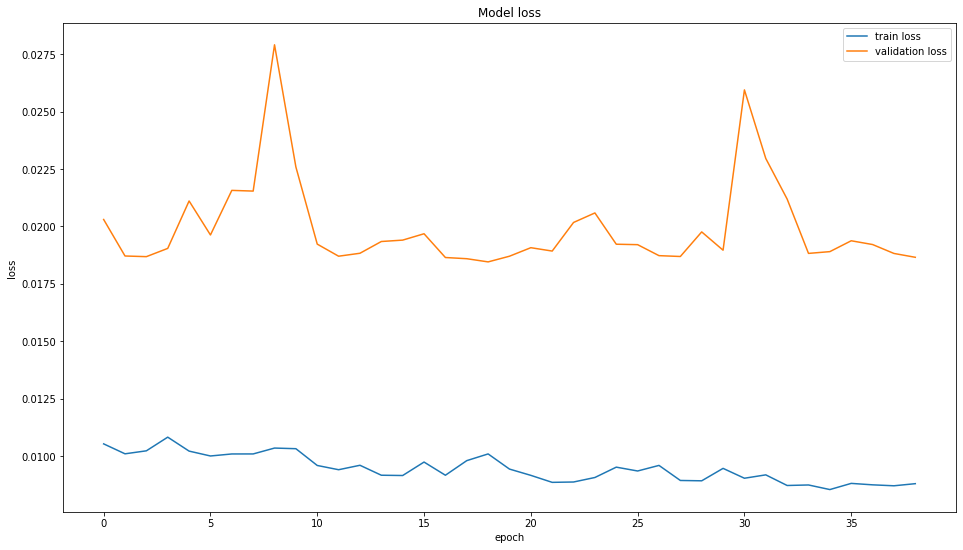

In [84]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show() 

In [71]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / (y_true+ 0.000001))) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [85]:
timeseries_evaluation_metrics_func(y_train.reshape(-1), lstm_model.predict(X_train).reshape(-1))

Evaluation metric results:-
MSE is : 0.010670232738015498
MAE is : 0.08146725013628772
RMSE is : 0.10329681862485164
MAPE is : 49546.9177504727
R2 is : -0.5594473835286278



In [86]:
timeseries_evaluation_metrics_func(y_valid.reshape(-1), lstm_model.predict(X_valid).reshape(-1))

Evaluation metric results:-
MSE is : 0.018652551557586154
MAE is : 0.10993049797736817
RMSE is : 0.136574344434034
MAPE is : 21.39461060338467
R2 is : -0.014770445819165312



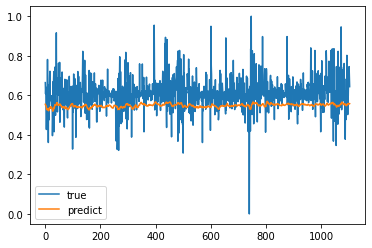

In [88]:
plt.plot(range(len(y_train.reshape(-1))), y_train.reshape(-1), label = 'true')
plt.plot(range(len(y_train.reshape(-1))), lstm_model.predict(X_train).reshape(-1), label = 'predict')
#plt.plot(range(len(y_train.reshape(-1))+len(y_valid.reshape(-1))), y_valid.reshape(-1), label = 'true_val')
#plt.plot(range(len(y_train.reshape(-1))+len(y_valid.reshape(-1))), lstm_model.predict(X_valid).reshape(-1), label = 'predict_val')

plt.legend()
plt.show()